In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from statsmodels.tsa.arima.model import ARIMA

In [ ]:
df = pd.read_csv("Walmart DataSet.csv")

In [ ]:
df.head()

,Store,Date,Weekly_Sales,Holiday_Flag,Temperature,Fuel_Price,CPI,Unemployment
0,1,05-02-2010,1643690.90,0,42.31,2.572,211.096358,8.106
1,1,12-02-2010,1641957.44,1,38.51,2.548,211.242170,8.106
2,1,19-02-2010,1611968.17,0,39.93,2.514,211.289143,8.106
3,1,26-02-2010,1409727.59,0,46.63,2.561,211.319643,8.106
4,1,05-03-2010,1554806.68,0,46.50,2.625,211.350143,8.106


In [ ]:
print(df.isnull().sum())

Store           0
Date            0
Weekly_Sales    0
Holiday_Flag    0
Temperature     0
Fuel_Price      0
CPI             0
Unemployment    0
dtype: int64


In [ ]:
correlation = df['Weekly_Sales'].corr(df['Unemployment'])
print("Correlation between Weekly Sales and Unemployment:", correlation)

Correlation between Weekly Sales and Unemployment: -0.10617608965795429


<ipython-input-8-e09dda06e913>:1: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  correlation_matrix = df.corr()


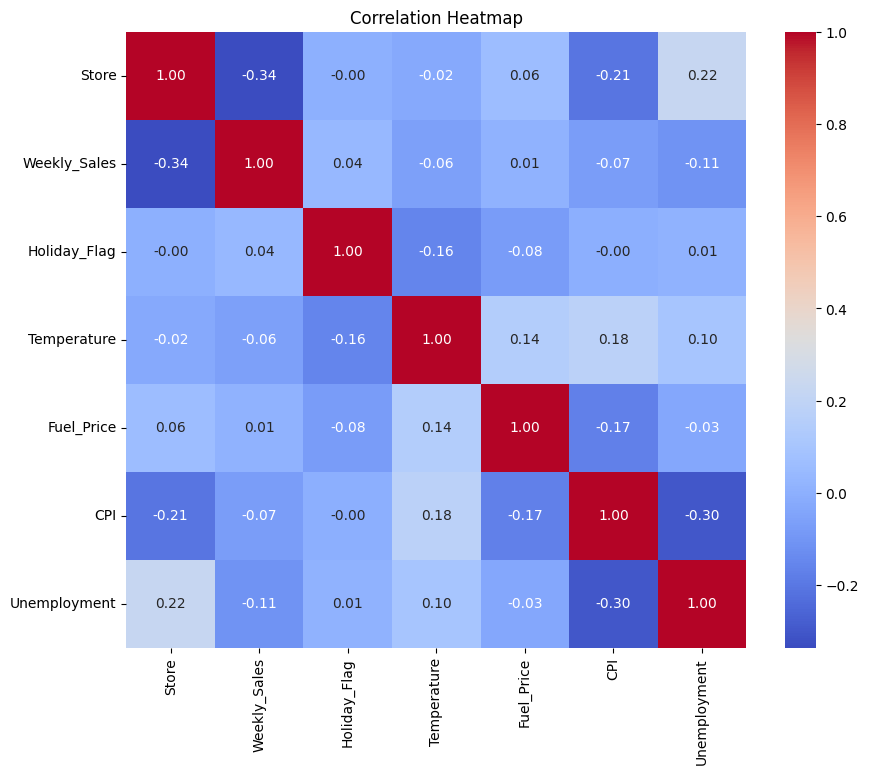

In [ ]:
correlation_matrix = df.corr()
plt.figure(figsize=(10, 8))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', fmt='.2f')
plt.title('Correlation Heatmap')
plt.show()

In [ ]:
store_correlation = df.groupby('Store')['Weekly_Sales', 'Unemployment'].corr().iloc[0::2, -1].reset_index()


<ipython-input-12-494c7a2f70cd>:1: FutureWarning: Indexing with multiple keys (implicitly converted to a tuple of keys) will be deprecated, use a list instead.
  store_correlation = df.groupby('Store')['Weekly_Sales', 'Unemployment'].corr().iloc[0::2, -1].reset_index()


In [ ]:
most_affected_store = store_correlation.loc[store_correlation['Unemployment'].idxmax()]


In [ ]:
#a:which stores are suffering the most?
most_affected_store

Store                     36
level_1         Weekly_Sales
Unemployment        0.833734
Name: 35, dtype: object

In [ ]:
most_affected_store_num = most_affected_store['Store']
most_affected_store_data = df[df['Store'] == most_affected_store_num]
correlation_most_affected = most_affected_store_data['Weekly_Sales'].corr(most_affected_store_data['Unemployment'])


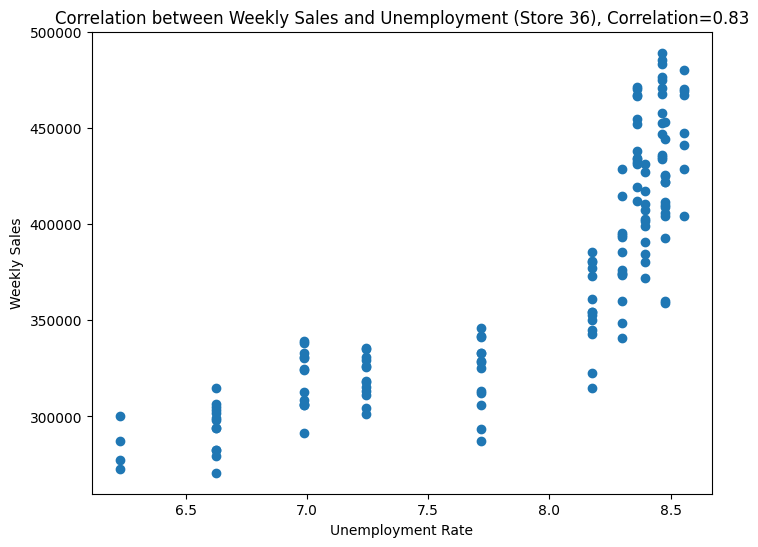

In [ ]:
plt.figure(figsize=(8, 6))
plt.scatter(most_affected_store_data['Unemployment'], most_affected_store_data['Weekly_Sales'])
plt.xlabel('Unemployment Rate')
plt.ylabel('Weekly Sales')
plt.title(f'Correlation between Weekly Sales and Unemployment (Store {most_affected_store_num}), Correlation={correlation_most_affected:.2f}')
plt.show()

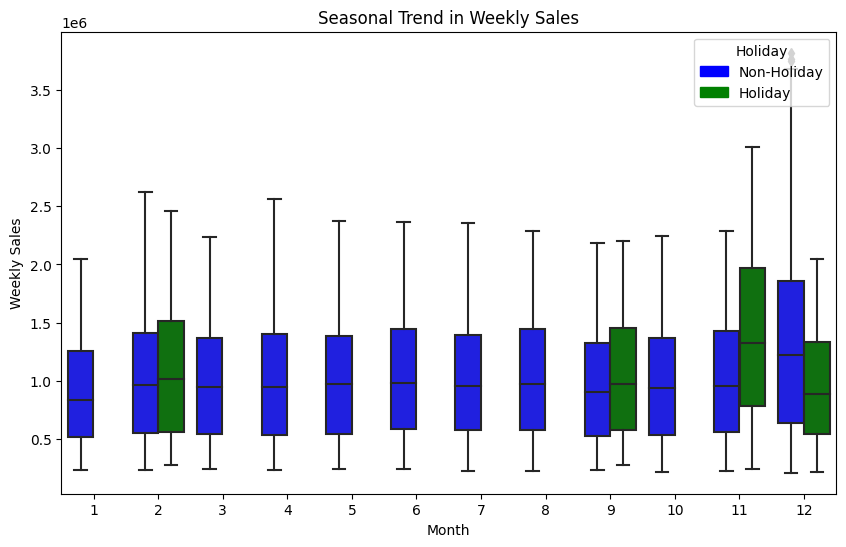

In [ ]:
# df['Date'] = pd.to_datetime(df['Date'], format='%d-%m-%Y')
# df['Month'] = df['Date'].dt.month
df['Date']=pd.to_datetime(df['Date'], format='%d-%m-%Y')
df['Month']=df['Date'].dt.month
holiday_colors = ['blue', 'green']
plt.figure(figsize=(10, 6))
sns.boxplot(x='Month', y='Weekly_Sales', hue='Holiday_Flag', data=df,palette=holiday_colors)
plt.xlabel('Month')
plt.ylabel('Weekly Sales')
plt.title('Seasonal Trend in Weekly Sales')
legend_labels = ['Non-Holiday', 'Holiday']
legend_handles = [plt.Rectangle((0, 0), 1, 1, color=color) for color in holiday_colors]
plt.legend(legend_handles, legend_labels, title='Holiday', loc='upper right')

plt.show()

In [ ]:
#c. Does temperature affect the weekly sales in any manner?
correlation_temp = df['Weekly_Sales'].corr(df['Temperature'])
print("Correlation between Weekly Sales and Temperature:", correlation_temp)



Correlation between Weekly Sales and Temperature: -0.06381001317946956


In [ ]:
# correlation of -0.0638 indicates a weak negative correlation, meaning that as the temperature increases, there is a slight tendency for the weekly sales to decrease, and vice versa.

In [ ]:
#d. How is the Consumer Price index affecting the weekly sales of various stores?
correlation_cpi = df['Weekly_Sales'].corr(df['CPI'])
print("Correlation between Weekly Sales and CPI:", correlation_cpi)

Correlation between Weekly Sales and CPI: -0.07263416204017631


In [ ]:
# correlation of -0.0726 indicates a weak negative correlation, which means that there is a slight tendency for weekly sales to decrease as the Consumer Price Index increases, and vice versa.

In [ ]:
# e. Identify the top-performing stores according to historical data.

top_stores = df.groupby('Store')['Weekly_Sales'].sum().nlargest(5)
print("Top-performing stores:")
print(top_stores)

Top-performing stores:
Store
20    3.013978e+08
4     2.995440e+08
14    2.889999e+08
13    2.865177e+08
2     2.753824e+08
Name: Weekly_Sales, dtype: float64


In [ ]:
# f. Determine the worst performing store and measure the difference between the highest and lowest performing stores.
worst_store = df.groupby('Store')['Weekly_Sales'].sum().nsmallest(1)
print("Worst-performing store:")
print(worst_store)

Worst-performing store:
Store
33    37160221.96
Name: Weekly_Sales, dtype: float64


In [ ]:
# Calculate the difference between the highest and lowest performing stores
difference = top_stores.max() - worst_store.min()
print("Difference between highest and lowest performing stores:", difference)

Difference between highest and lowest performing stores: 264237570.49999997


In [ ]:
df2=df.copy()
df3=df.copy()

In [ ]:
df2.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 6435 entries, 0 to 6434
Data columns (total 9 columns):
 #   Column        Non-Null Count  Dtype         
---  ------        --------------  -----         
 0   Store         6435 non-null   int64         
 1   Date          6435 non-null   datetime64[ns]
 2   Weekly_Sales  6435 non-null   float64       
 3   Holiday_Flag  6435 non-null   int64         
 4   Temperature   6435 non-null   float64       
 5   Fuel_Price    6435 non-null   float64       
 6   CPI           6435 non-null   float64       
 7   Unemployment  6435 non-null   float64       
 8   Month         6435 non-null   int64         
dtypes: datetime64[ns](1), float64(5), int64(3)
memory usage: 452.6 KB


In [ ]:
#converting date to datetime
df2['Date']=pd.to_datetime(df2['Date'])


In [ ]:
df2.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 6435 entries, 0 to 6434
Data columns (total 8 columns):
 #   Column        Non-Null Count  Dtype         
---  ------        --------------  -----         
 0   Store         6435 non-null   int64         
 1   Date          6435 non-null   datetime64[ns]
 2   Weekly_Sales  6435 non-null   float64       
 3   Holiday_Flag  6435 non-null   int64         
 4   Temperature   6435 non-null   float64       
 5   Fuel_Price    6435 non-null   float64       
 6   CPI           6435 non-null   float64       
 7   Unemployment  6435 non-null   float64       
dtypes: datetime64[ns](1), float64(5), int64(2)
memory usage: 402.3 KB


In [ ]:
df3['Date']=pd.to_datetime(df3['Date'])


<ipython-input-80-fc7f5ebd9fc3>:1: UserWarning: Parsing dates in DD/MM/YYYY format when dayfirst=False (the default) was specified. This may lead to inconsistently parsed dates! Specify a format to ensure consistent parsing.
  df3['Date']=pd.to_datetime(df3['Date'])


In [ ]:
df3.index=df3['Date']
df3.head()

,Store,Date,Weekly_Sales,Holiday_Flag,Temperature,Fuel_Price,CPI,Unemployment
Date,,,,,,,,
2010-05-02,1,2010-05-02,1643690.90,0,42.31,2.572,211.096358,8.106
2010-12-02,1,2010-12-02,1641957.44,1,38.51,2.548,211.242170,8.106
2010-02-19,1,2010-02-19,1611968.17,0,39.93,2.514,211.289143,8.106
2010-02-26,1,2010-02-26,1409727.59,0,46.63,2.561,211.319643,8.106
2010-05-03,1,2010-05-03,1554806.68,0,46.50,2.625,211.350143,8.106


In [ ]:

df2.index=df2['Date']
df2.head()

,Store,Date,Weekly_Sales,Holiday_Flag,Temperature,Fuel_Price,CPI,Unemployment,Month
Date,,,,,,,,,
2010-02-05,1,2010-02-05,1643690.90,0,42.31,2.572,211.096358,8.106,2
2010-02-12,1,2010-02-12,1641957.44,1,38.51,2.548,211.242170,8.106,2
2010-02-19,1,2010-02-19,1611968.17,0,39.93,2.514,211.289143,8.106,2
2010-02-26,1,2010-02-26,1409727.59,0,46.63,2.561,211.319643,8.106,2
2010-03-05,1,2010-03-05,1554806.68,0,46.50,2.625,211.350143,8.106,3


In [ ]:
del df2['Date']
df2.head()

,Store,Weekly_Sales,Holiday_Flag,Temperature,Fuel_Price,CPI,Unemployment,Month
Date,,,,,,,,
2010-02-05,1,1643690.90,0,42.31,2.572,211.096358,8.106,2
2010-02-12,1,1641957.44,1,38.51,2.548,211.242170,8.106,2
2010-02-19,1,1611968.17,0,39.93,2.514,211.289143,8.106,2
2010-02-26,1,1409727.59,0,46.63,2.561,211.319643,8.106,2
2010-03-05,1,1554806.68,0,46.50,2.625,211.350143,8.106,3


In [ ]:
columns= ['Store', 'Holiday_Flag', 'Temperature','Fuel_Price','CPI','Unemployment','Month']
df2.drop(columns, axis=1, inplace=True)
df2.head()

,Weekly_Sales
Date,
2010-02-05,1643690.90
2010-02-12,1641957.44
2010-02-19,1611968.17
2010-02-26,1409727.59
2010-03-05,1554806.68


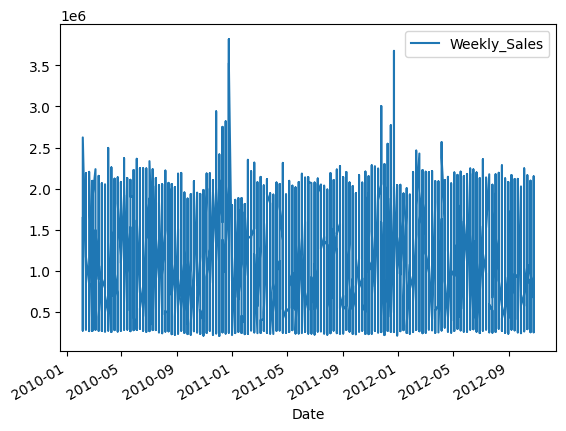

In [ ]:
df2.plot()

plt.show()

<Axes: title={'center': 'Original Values'}, xlabel='Date'>

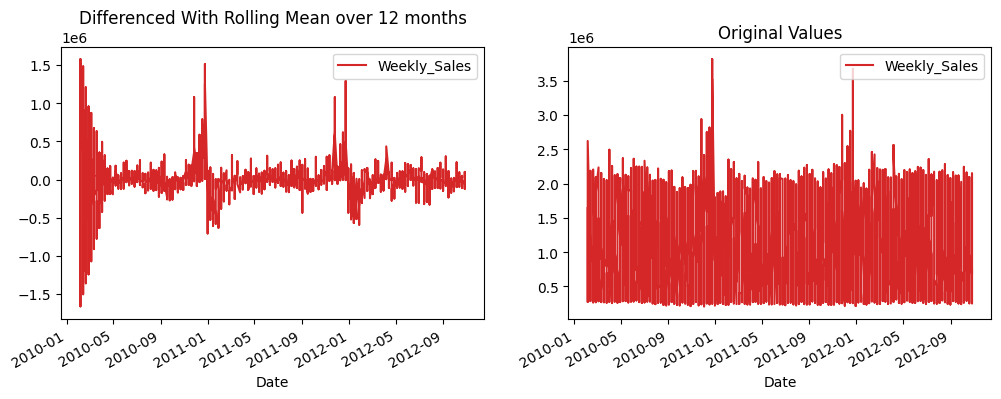

In [ ]:
rolling_mean = df2.rolling(window=12).mean()
rolling_mean_detrended = df2 - rolling_mean
ax1 = plt.subplot(121)
rolling_mean_detrended.plot(figsize=(12,4),color="tab:red",
                            title="Differenced With Rolling Mean over 12 months",
                            ax=ax1)
ax2 = plt.subplot(122)
df2.plot(figsize=(12,4),
          color="tab:red",
          title="Original Values",
          ax=ax2)

<Axes: title={'center': 'Differenced With Rolling Mean over 12 months'}, xlabel='Date'>

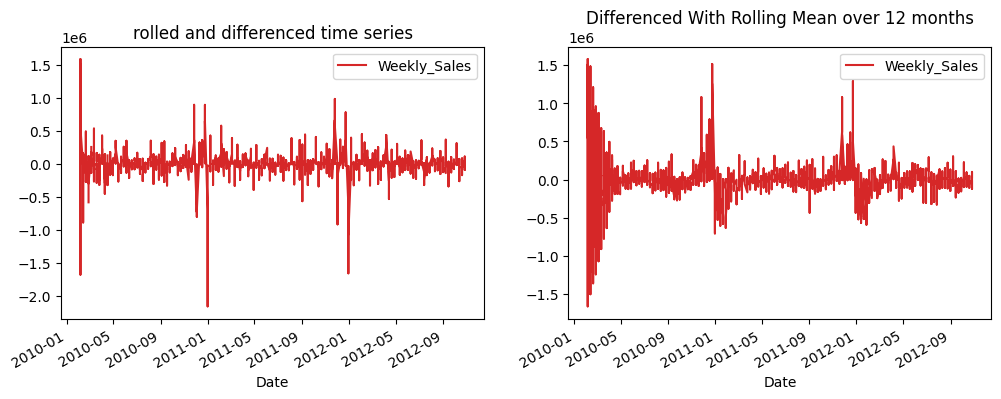

In [ ]:
rolling_mean_detrended_diff = rolling_mean_detrended - rolling_mean_detrended.shift()

ax1 = plt.subplot(121)
rolling_mean_detrended_diff.plot(figsize=(12,4),
                                 color="tab:red",
                                 title="rolled and differenced time series",
                                 ax=ax1)
ax1 = plt.subplot(122)
rolling_mean_detrended.plot(figsize=(12,4),color="tab:red",
                            title="Differenced With Rolling Mean over 12 months",
                            ax=ax1)

In [ ]:
rolling_mean_detrended_diff.head(14)

,Weekly_Sales
Date,
2010-02-05,NaN
2010-02-12,NaN
2010-02-19,NaN
2010-02-26,NaN
2010-03-05,NaN
2010-03-12,NaN
2010-03-19,NaN
2010-03-26,NaN
2010-04-02,NaN


In [ ]:
rolling_mean_detrended_diff = rolling_mean_detrended_diff.dropna()

In [ ]:
rolling_mean_detrended_diff.head()

,Weekly_Sales
Date,
2010-04-30,52060.439167
2010-05-07,182021.270000
2010-05-14,-99893.897500
2010-05-21,-93750.636667
2010-05-28,42635.940833


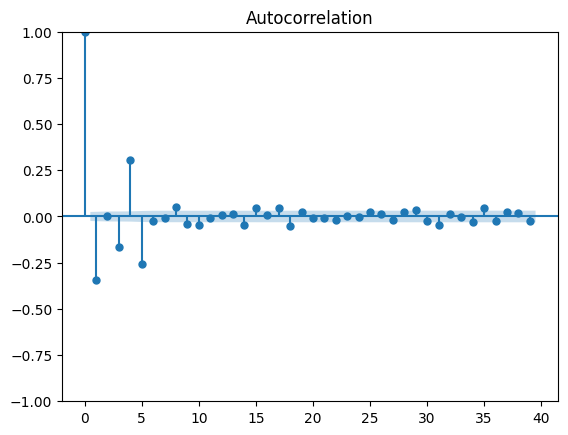

In [ ]:
from pandas.plotting import autocorrelation_plot
from statsmodels.graphics.tsaplots import plot_acf
plot_acf(rolling_mean_detrended_diff['Weekly_Sales']);

/usr/local/lib/python3.10/dist-packages/statsmodels/graphics/tsaplots.py:348: FutureWarning: The default method 'yw' can produce PACF values outside of the [-1,1] interval. After 0.13, the default will change tounadjusted Yule-Walker ('ywm'). You can use this method now by setting method='ywm'.
  warnings.warn(


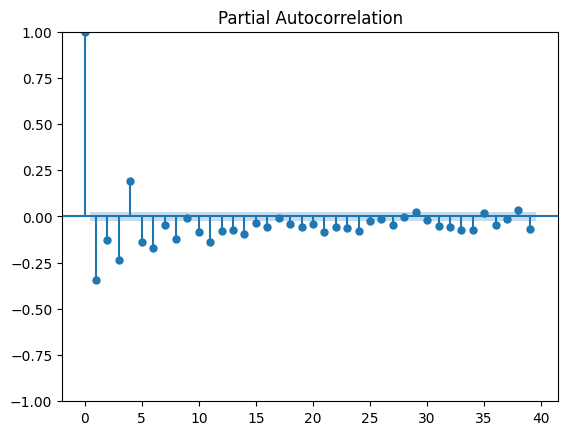

In [ ]:
from statsmodels.graphics.tsaplots import plot_pacf

plot_pacf(rolling_mean_detrended_diff['Weekly_Sales']);

In [ ]:
train = rolling_mean_detrended_diff.iloc[:5148]['Weekly_Sales']
test = rolling_mean_detrended_diff.iloc[5149:]['Weekly_Sales']

In [ ]:
!pip install pmdarima

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.8/1.8 MB 14.4 MB/s eta 0:00:00


In [ ]:
from pmdarima import auto_arima

In [ ]:
order = auto_arima(rolling_mean_detrended_diff['Weekly_Sales'], trace=True)
order.summary()

Performing stepwise search to minimize aic
 ARIMA(2,0,2)(0,0,0)[0] intercept   : AIC=inf, Time=15.66 sec
 ARIMA(0,0,0)(0,0,0)[0] intercept   : AIC=173656.880, Time=0.34 sec
 ARIMA(1,0,0)(0,0,0)[0] intercept   : AIC=172860.951, Time=0.60 sec
 ARIMA(0,0,1)(0,0,0)[0] intercept   : AIC=172627.285, Time=1.38 sec
 ARIMA(0,0,0)(0,0,0)[0]             : AIC=173654.880, Time=0.16 sec
 ARIMA(1,0,1)(0,0,0)[0] intercept   : AIC=inf, Time=8.80 sec
 ARIMA(0,0,2)(0,0,0)[0] intercept   : AIC=172608.329, Time=2.20 sec
 ARIMA(1,0,2)(0,0,0)[0] intercept   : AIC=172558.921, Time=5.96 sec
 ARIMA(1,0,3)(0,0,0)[0] intercept   : AIC=inf, Time=16.22 sec
 ARIMA(0,0,3)(0,0,0)[0] intercept   : AIC=inf, Time=7.06 sec
 ARIMA(2,0,1)(0,0,0)[0] intercept   : AIC=inf, Time=8.45 sec
 ARIMA(2,0,3)(0,0,0)[0] intercept   : AIC=172037.822, Time=4.77 sec
 ARIMA(3,0,3)(0,0,0)[0] intercept   : AIC=172006.466, Time=6.45 sec
 ARIMA(3,0,2)(0,0,0)[0] intercept   : AIC=172011.876, Time=3.90 sec
 ARIMA(4,0,3)(0,0,0)[0] intercept   : 

<class 'statsmodels.iolib.summary.Summary'>
"""
                               SARIMAX Results                                
==============================================================================
Dep. Variable:                      y   No. Observations:                 6423
Model:               SARIMAX(4, 0, 2)   Log Likelihood              -85991.890
Date:                Mon, 24 Jul 2023   AIC                         171997.780
Time:                        15:21:25   BIC                         172045.153
Sample:                             0   HQIC                        172014.175
                               - 6423                                         
Covariance Type:                  opg                                         
==============================================================================
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
ar.L1         -1.4160      0.044    -32.232      0.000      -1.502      -1.330
ar.L2         -1.1345      0.039    -29.209      0.000      -1.211      -1.058
ar.L3         -0.5901      0.022    -27.021      0.000      -0.633      -0.547
ar.L4         -0.1207      0.020     -6.086      0.000      -0.160      -0.082
ma.L1          1.0708      0.044     24.205      0.000       0.984       1.158
ma.L2          0.5886      0.025     23.802      0.000       0.540       0.637
sigma2      2.432e+10   4.31e-12   5.65e+21      0.000    2.43e+10    2.43e+10
===================================================================================
Ljung-Box (L1) (Q):                   0.00   Jarque-Bera (JB):            109531.45
Prob(Q):                              0.95   Prob(JB):                         0.00
Heteroskedasticity (H):               0.33   Skew:                            -1.02
Prob(H) (two-sided):                  0.00   Kurtosis:                        23.13
===================================================================================

Warnings:
[1] Covariance matrix calculated using the outer product of gradients (complex-step).
[2] Covariance matrix is singular or near-singular, with condition number 2.51e+36. Standard errors may be unstable.
"""

In [ ]:
! pip install statsmodels
from statsmodels.tsa.arima.model import ARIMA

In [ ]:
train= train.resample('W').mean()

In [ ]:
model = ARIMA(train, order=(4,0,2))
model_fit = model.fit() # training
model_fit.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                               SARIMAX Results                                
==============================================================================
Dep. Variable:           Weekly_Sales   No. Observations:                  143
Model:                 ARIMA(4, 0, 2)   Log Likelihood               -1875.305
Date:                Mon, 24 Jul 2023   AIC                           3766.609
Time:                        15:22:52   BIC                           3790.312
Sample:                    02-07-2010   HQIC                          3776.241
                         - 10-28-2012                                         
Covariance Type:                  opg                                         
==============================================================================
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
const         25.9404   6969.351      0.004      0.997   -1.36e+04    1.37e+04
ar.L1         -1.6415      0.165     -9.964      0.000      -1.964      -1.319
ar.L2         -1.4385      0.165     -8.741      0.000      -1.761      -1.116
ar.L3         -0.7801      0.126     -6.203      0.000      -1.027      -0.534
ar.L4         -0.2008      0.117     -1.714      0.086      -0.430       0.029
ma.L1          1.2812      0.152      8.441      0.000       0.984       1.579
ma.L2          0.7791      0.103      7.530      0.000       0.576       0.982
sigma2      1.469e+10      0.000   5.25e+13      0.000    1.47e+10    1.47e+10
===================================================================================
Ljung-Box (L1) (Q):                   0.00   Jarque-Bera (JB):               337.57
Prob(Q):                              0.99   Prob(JB):                         0.00
Heteroskedasticity (H):               0.72   Skew:                            -0.64
Prob(H) (two-sided):                  0.26   Kurtosis:                        10.42
===================================================================================

Warnings:
[1] Covariance matrix calculated using the outer product of gradients (complex-step).
[2] Covariance matrix is singular or near-singular, with condition number 2.67e+30. Standard errors may be unstable.
"""

<Axes: xlabel='Date'>

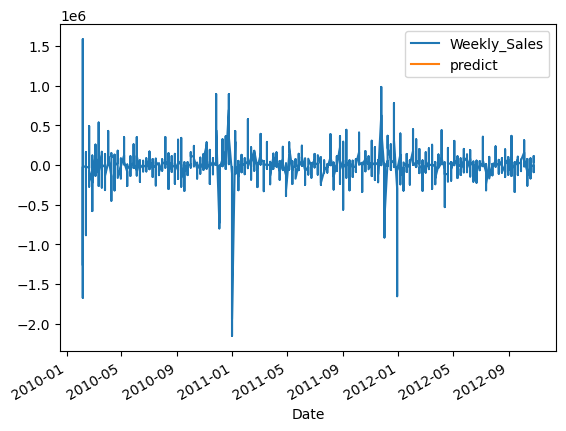

In [ ]:
rolling_mean_detrended_diff['predict'] = model_fit.predict(start= len(train),
                                    end=len(train)+len(test)- 1,
                                    dynamic=True)
rolling_mean_detrended_diff[['Weekly_Sales','predict']].plot()


In [ ]:
from statsmodels.tsa.statespace.sarimax import SARIMAX,SARIMAXResults


/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/base/tsa_model.py:471: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/base/tsa_model.py:471: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/base/tsa_model.py:834: ValueWarning: No supported index is available. Prediction results will be given with an integer index beginning at `start`.
  return get_prediction_index(


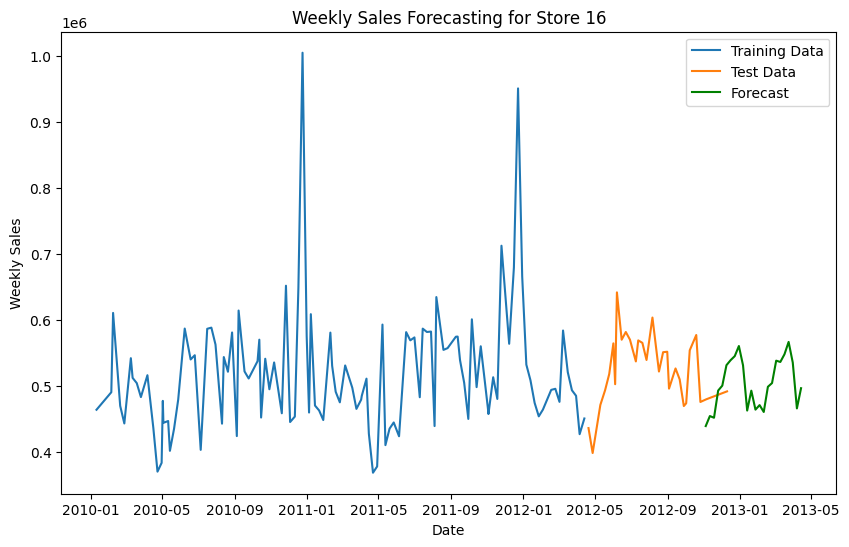

/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/base/tsa_model.py:471: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/base/tsa_model.py:471: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/base/tsa_model.py:834: ValueWarning: No supported index is available. Prediction results will be given with an integer index beginning at `start`.
  return get_prediction_index(


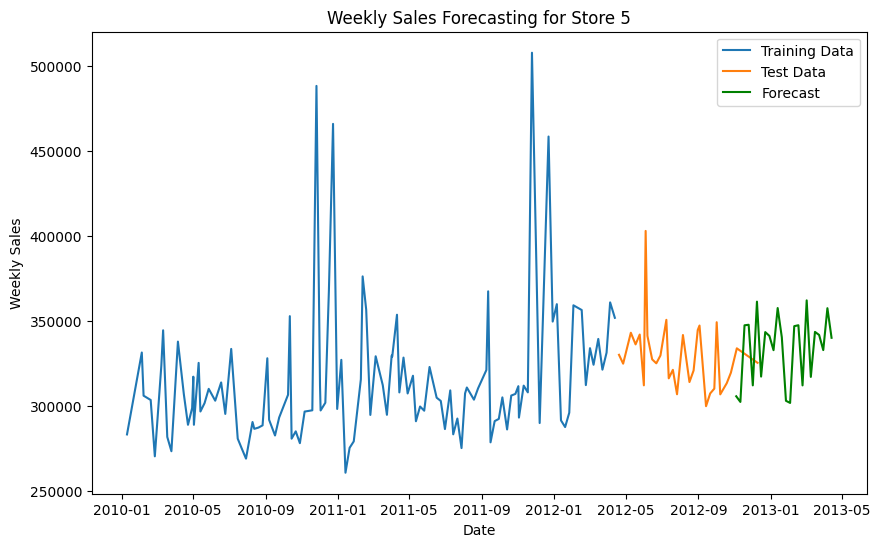

/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/base/tsa_model.py:471: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/base/tsa_model.py:471: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/base/tsa_model.py:834: ValueWarning: No supported index is available. Prediction results will be given with an integer index beginning at `start`.
  return get_prediction_index(


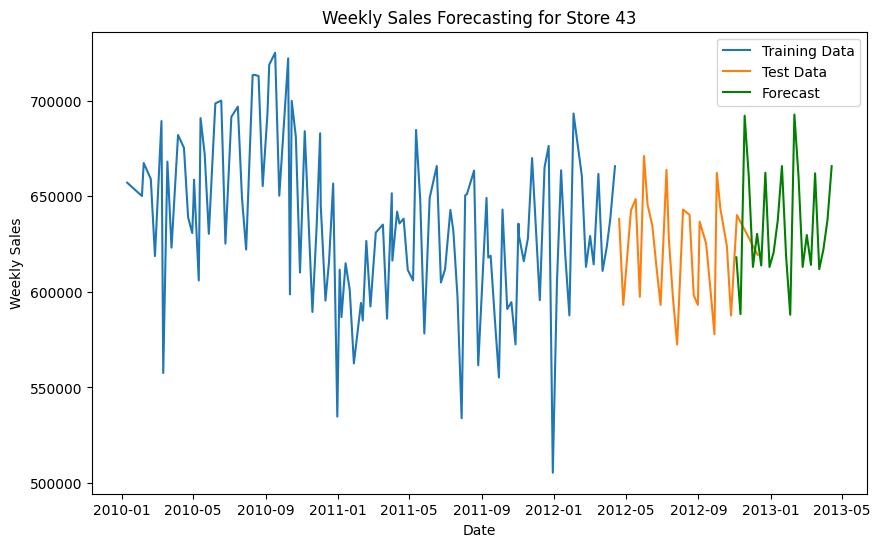

/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/base/tsa_model.py:471: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/base/tsa_model.py:471: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/base/tsa_model.py:834: ValueWarning: No supported index is available. Prediction results will be given with an integer index beginning at `start`.
  return get_prediction_index(


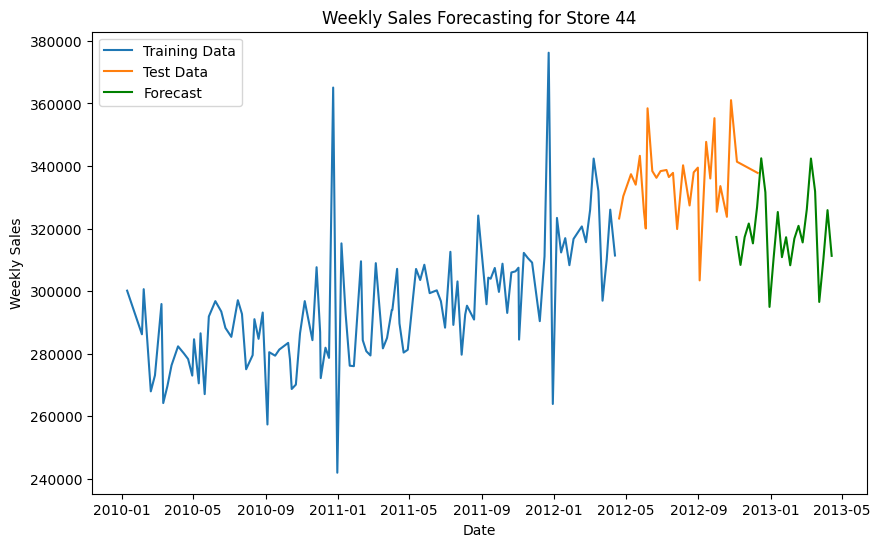

/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/base/tsa_model.py:471: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/base/tsa_model.py:471: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/base/tsa_model.py:834: ValueWarning: No supported index is available. Prediction results will be given with an integer index beginning at `start`.
  return get_prediction_index(


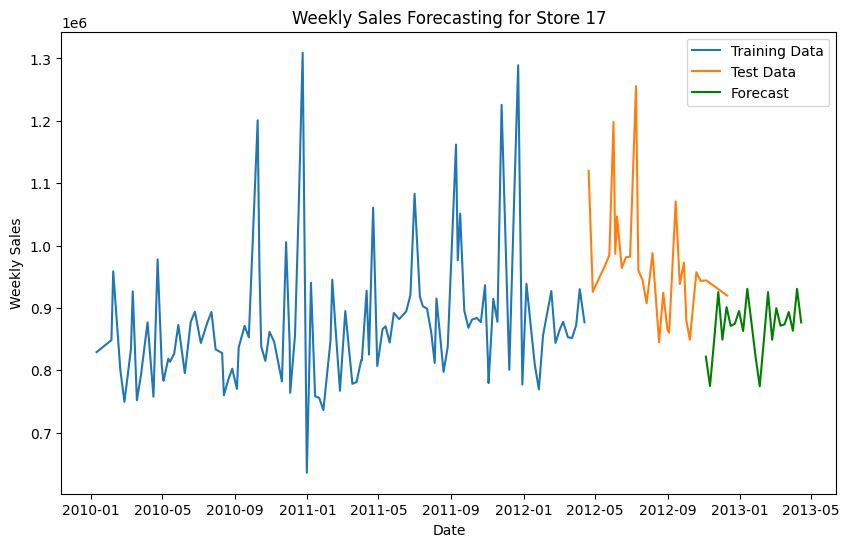

In [ ]:
#2.forecast for random 5 stores
random_stores = np.random.choice(df3['Store'].unique(), 5, replace=False)
for store_id in random_stores:
    # Filter data for the selected store
    df_selected_store = df3[df3['Store'] == store_id]

    # Sort data by date (if not already sorted)
    df_selected_store = df_selected_store.sort_index()

    # Split data into training and testing sets
    train_ratio = 0.8
    train_size = int(len(df_selected_store) * train_ratio)
    train_data = df_selected_store.iloc[:train_size]
    test_data = df_selected_store.iloc[train_size:]

    # SARIMA Model
    order = (1, 0, 0) # Non-seasonal order (p, d, q)
    seasonal_order = (1, 1, 1, 12) # Seasonal order (P, D, Q, seasonal_period)

    # Fit the SARIMA model on training data
    sarima_model = SARIMAX(train_data['Weekly_Sales'], order=order, seasonal_order=seasonal_order)
    sarima_fit = sarima_model.fit()

    # Forecast using the SARIMA model
    forecast_steps = 24
    forecast = sarima_fit.forecast(steps=forecast_steps)
    last_date = df3.index[-1]
    forecast_dates = pd.date_range(start=last_date + pd.Timedelta(days=7), periods=forecast_steps, freq='W')
    forecast_df = pd.DataFrame({'Forecasted_Sales': forecast}, index=forecast_dates)

    # Plotting the results
    plt.figure(figsize=(10, 6))
    plt.plot(train_data.index, train_data['Weekly_Sales'], label='Training Data')
    plt.plot(test_data.index, test_data['Weekly_Sales'], label='Test Data')
    plt.plot(forecast_df.index, forecast, label='Forecast', color='green')
    plt.xlabel('Date')
    plt.ylabel('Weekly Sales')
    plt.title(f'Weekly Sales Forecasting for Store {store_id}')
    plt.legend()
    plt.show()